In [1]:
from transformers import (
    AutoModelForTokenClassification,
    AutoTokenizer,
    DataCollatorForTokenClassification,
)
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from tqdm import tqdm
from seqeval.metrics import classification_report
from nlp_project.models import CubeBert
from nlp_project.data import json_to_Dataset, json_to_Dataset_adv, json_to_Dataset_ensemble
from nlp_project.utils import compute_metrics, compute_all_metrics, compute_metrics_ensemble, all_labels, id2label, label2id, n_labels

c:\Users\samue\Desktop\nlp-project\cubo_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
d_test = [i for i in json_to_Dataset("../datasets/distilbert_test.json")]
d_test_adv = [i for i in json_to_Dataset_adv("../datasets/distilbert_test_adv.json")]
a_test = [i for i in json_to_Dataset("../datasets/albert_test.json")]
a_test_adv = [i for i in json_to_Dataset_adv("../datasets/albert_test_adv.json")]

In [3]:
d1_model = AutoModelForTokenClassification.from_pretrained(
    "../models/distilbert1"
)
d1_tokenizer = AutoTokenizer.from_pretrained("../models/distilbert1")

a1_model = AutoModelForTokenClassification.from_pretrained(
    "../models/albert1"
)
a1_tokenizer = AutoTokenizer.from_pretrained("../models/albert1")

d1_model_adv = AutoModelForTokenClassification.from_pretrained(
    "../models/distilbert1_adv"
)
d1_tokenizer_adv = AutoTokenizer.from_pretrained("../models/distilbert1_adv")

a1_model_adv = AutoModelForTokenClassification.from_pretrained(
    "../models/albert1_adv"
)
a1_tokenizer_adv = AutoTokenizer.from_pretrained("../models/albert1_adv")

# Inference on standard dataset

In [4]:
res = compute_all_metrics(d1_model, d_test)
res

Inference Progress: 100%|██████████| 2320/2320 [00:55<00:00, 42.06it/s]


{'precision': np.float64(0.9448520710059172),
 'recall': np.float64(0.9570081508710244),
 'f1': np.float64(0.9508912620588352),
 'accuracy': 0.9939824318269441,
 'confusion_matrix': array([[ 525,    1,    0, ...,    0,    0,    0],
        [   7,  518,    0, ...,    0,    0,    0],
        [   0,    0,  728, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0, 1588,    0],
        [   0,    0,    0, ...,    0,    0,  211]], shape=(45, 45))}

In [5]:
conf = np.log(res["confusion_matrix"] + 0.01)

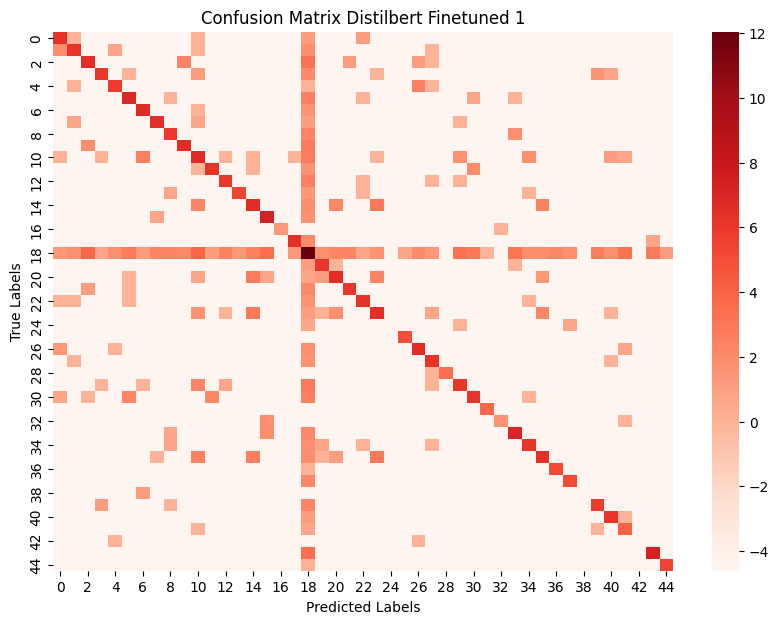

In [6]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Distilbert Finetuned 1")
plt.show()

In [7]:
res = compute_all_metrics(a1_model, a_test)
res

Inference Progress: 100%|██████████| 2320/2320 [04:23<00:00,  8.80it/s]


{'precision': np.float64(0.9446734305643627),
 'recall': np.float64(0.95237334185712),
 'f1': np.float64(0.9485077596498208),
 'accuracy': 0.9938463784894424,
 'confusion_matrix': array([[ 522,    3,    0, ...,    0,    0,    0],
        [   1,  516,    0, ...,    0,    0,    0],
        [   0,    0,  710, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0, 1590,    0],
        [   0,    0,    0, ...,    0,    0,  206]], shape=(45, 45))}

In [8]:
conf = np.log(res["confusion_matrix"] + 0.01)

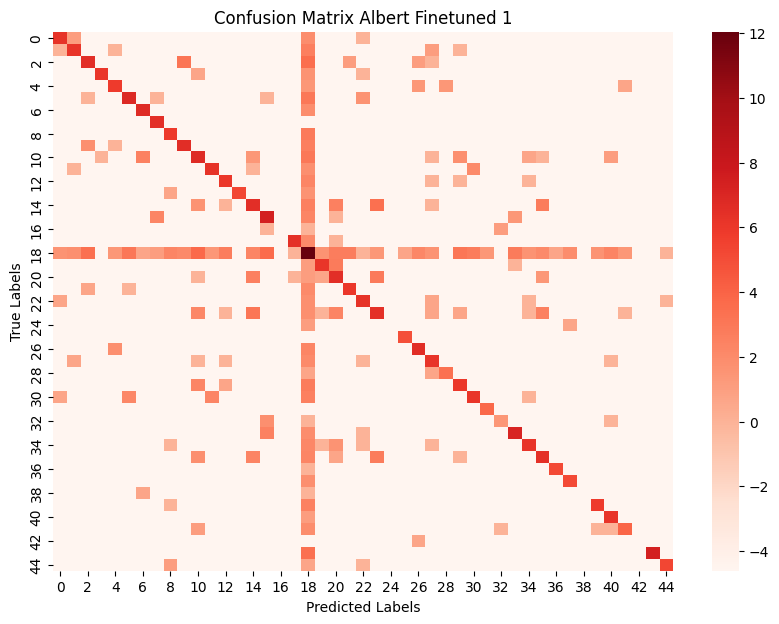

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Albert Finetuned 1")
plt.show()

# Inference on adversarial dataset

In [10]:
res = compute_all_metrics(d1_model, d_test_adv)
res

Inference Progress: 100%|██████████| 962/962 [01:20<00:00, 12.01it/s]


{'precision': np.float64(0.49486963835155595),
 'recall': np.float64(0.6415176624509377),
 'f1': np.float64(0.5587313645427785),
 'accuracy': 0.9469328263624841,
 'confusion_matrix': array([[ 72,   0,   0, ...,   0,   0,   0],
        [  1, 122,   0, ...,   1,   0,   0],
        [  0,   0, 263, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  55,   0,   0],
        [  0,   0,   0, ...,   0, 608,   0],
        [  0,   0,   0, ...,   1,   0,  61]], shape=(41, 41))}

In [11]:
conf = np.log(res["confusion_matrix"] + 0.01)

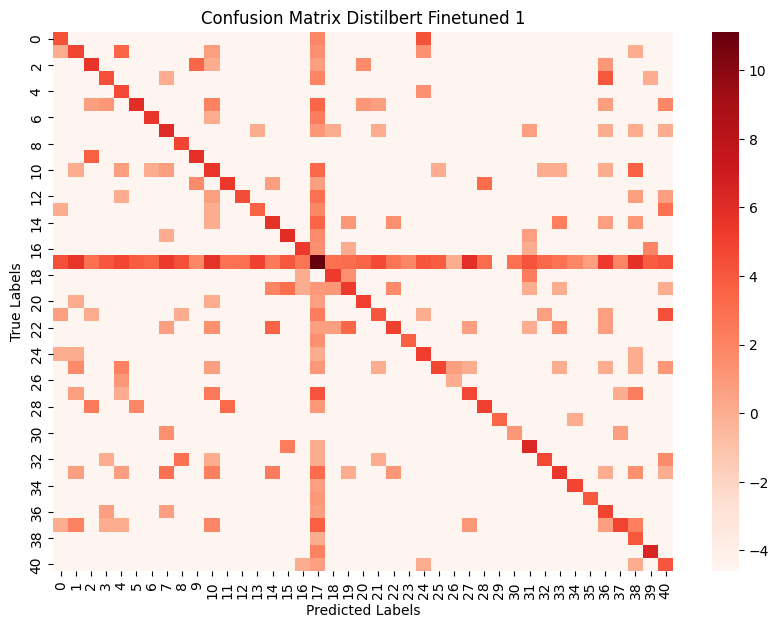

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Distilbert Finetuned 1")
plt.show()

In [13]:
res = compute_all_metrics(a1_model, a_test_adv)
res

Inference Progress: 100%|██████████| 962/962 [02:25<00:00,  6.60it/s]


{'precision': np.float64(0.561275881365417),
 'recall': np.float64(0.6561273440907108),
 'f1': np.float64(0.6050065346335579),
 'accuracy': 0.9589094918820263,
 'confusion_matrix': array([[125,   7,   0, ...,   1,   0,   0],
        [  0, 134,   0, ...,   0,   0,   0],
        [  0,   0, 269, ...,   0,   1,   0],
        ...,
        [  0,   0,   0, ...,  33,   0,   0],
        [  0,   0,   0, ...,   0, 607,   0],
        [  0,   0,   0, ...,   0,   0,  53]], shape=(41, 41))}

In [14]:
conf = np.log(res["confusion_matrix"] + 0.01)

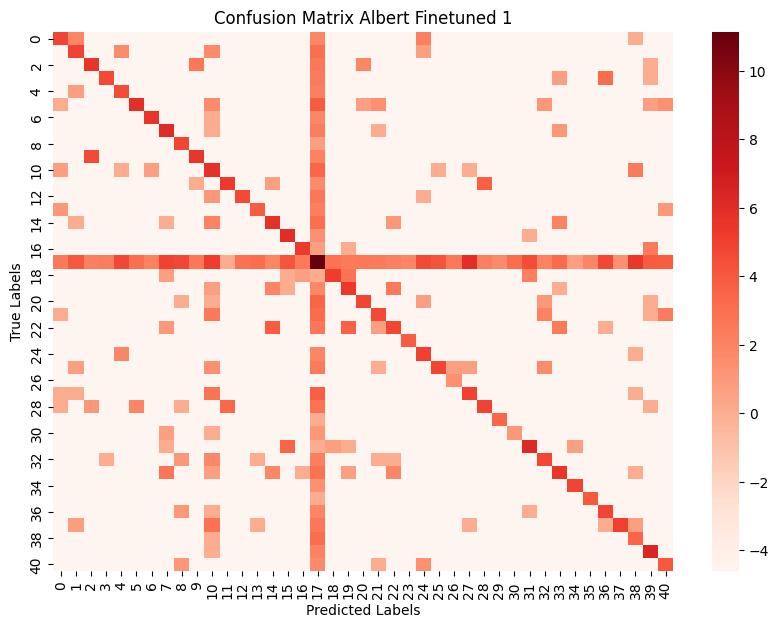

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Albert Finetuned 1")
plt.show()

# Inference on adversarial dataset (post adv fine tuning)

In [16]:
res = compute_all_metrics(d1_model_adv, d_test_adv)
res

Inference Progress: 100%|██████████| 962/962 [00:22<00:00, 42.43it/s]


{'precision': np.float64(0.9116827438370847),
 'recall': np.float64(0.9273877017008286),
 'f1': np.float64(0.9194681656037186),
 'accuracy': 0.9913941698352344,
 'confusion_matrix': array([[143,   1,   0, ...,   0,   0,   0],
        [  4, 154,   0, ...,   0,   0,   0],
        [  0,   0, 247, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  26,   0,   0],
        [  0,   0,   0, ...,   0, 609,   0],
        [  0,   0,   0, ...,   0,   0,  62]], shape=(41, 41))}

In [17]:
conf = np.log(res["confusion_matrix"] + 0.01)

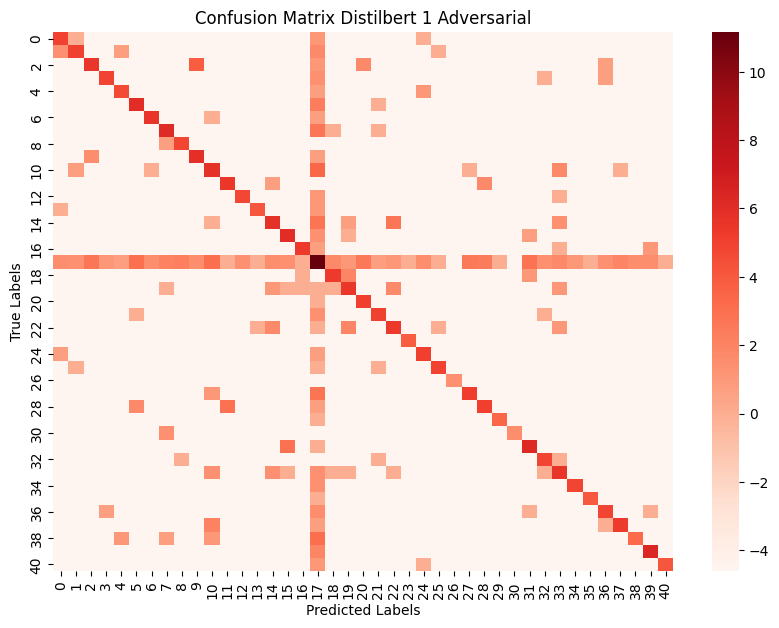

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Distilbert 1 Adversarial")
plt.show()

In [19]:
res = compute_all_metrics(a1_model_adv, a_test_adv)
res

Inference Progress: 100%|██████████| 962/962 [01:31<00:00, 10.46it/s]


{'precision': np.float64(0.9378114842903575),
 'recall': np.float64(0.9437418229393807),
 'f1': np.float64(0.940767307901315),
 'accuracy': 0.9928516204261144,
 'confusion_matrix': array([[148,   0,   0, ...,   0,   0,   0],
        [  1, 163,   0, ...,   0,   0,   0],
        [  0,   0, 281, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  12,   0,   0],
        [  0,   0,   0, ...,   0, 606,   0],
        [  0,   0,   0, ...,   0,   0,  64]], shape=(41, 41))}

In [20]:
conf = np.log(res["confusion_matrix"] + 0.01)

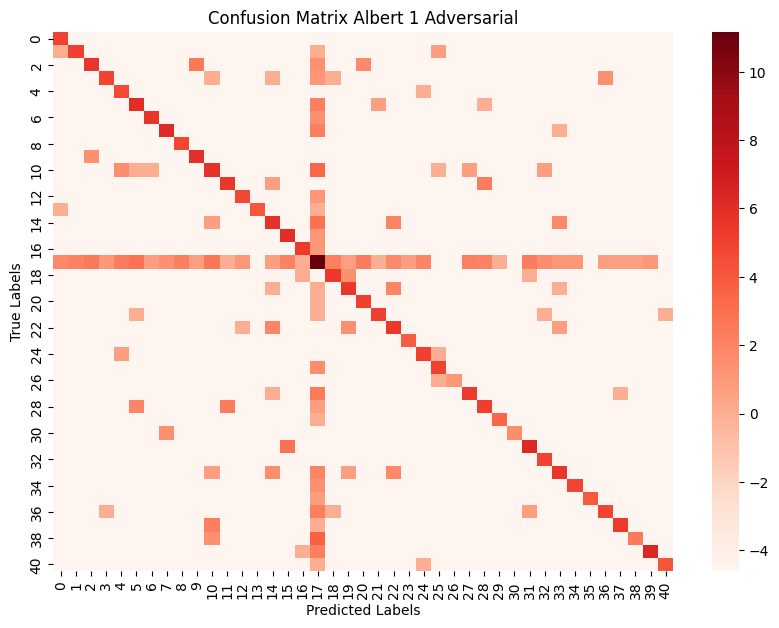

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf, cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Albert 1 Adversarial")
plt.show()

# Ensemble

In [4]:
model = CubeBert(distilbert_model="../models/distilbert1", albert_model="../models/albert1")
state_dict = torch.load("../models/cubebert/CubeBert.pt", map_location=torch.device("cpu"))
model.load_state_dict(state_dict)
model.eval()

CubeBert(
  (distilbert): DistilBertForTokenClassification(
    (distilbert): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): DistilBertSdpaAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (ffn

In [5]:
data = json_to_Dataset_ensemble("../datasets/ensemble_test.json")

In [6]:
res = compute_metrics_ensemble(model, data)
print(res)

Evaluating: 100%|██████████| 2320/2320 [06:15<00:00,  6.19it/s]


{'precision': np.float64(0.37319019923276825), 'recall': np.float64(0.963960364391881), 'f1': np.float64(0.5380703867255454), 'accuracy': 0.9022040847208365, 'confusion_matrix': array([[ 524,    2,    0, ...,    0,    0,    0],
       [   2,  523,    0, ...,    0,    0,    0],
       [   0,    0,  718, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, 1586,    0],
       [   0,    0,    0, ...,    0,    0,  208]], shape=(45, 45))}
